In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [4]:
# Using Yiting Cleaned Reviews

full_df = pd.read_csv(filepath_or_buffer='../../data/curated/reviews/yiting_cleaned_reviews.csv')
full_df.head()

,Sentiment,Time,Text,processed_text
0,0,18/6/21,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...
1,0,7/7/21,I've been very pleased with the Natural Balanc...,please natural balance dog food dog issue dog ...
2,0,18/6/21,"Before I was educated about feline nutrition, ...",educate feline nutrition allow cat become addi...
3,0,7/7/21,"My holistic vet recommended this, along with a...",holistic vet recommend along brand try cat pre...
4,0,1/7/21,I bought this coffee because its much cheaper ...,buy coffee much cheaper ganocafe organic reish...


## Train-Test Split -> leave out 20% for testing

In [5]:
from sklearn.model_selection import train_test_split
full_label = full_df['Sentiment']
full_text = full_df['processed_text']

X_train, X_test, y_train, y_test = train_test_split(full_text, full_label, test_size = 0.2, random_state=4211)

### Feature Engineering with TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(
    max_df = 0.5,
    sublinear_tf = True
)
train_vectors = tf_idf_vectorizer.fit_transform(X_train)

### Fit SVM & Cross Validation

In [7]:
# Fit SVM
import time
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score

In [8]:
svm_linear_classifier = svm.LinearSVC()
k_folds = KFold(n_splits=5)
val_scores = cross_val_score(svm_linear_classifier, train_vectors, y_train, cv=k_folds)

print(f"Cross validation scores: {val_scores}") # [0.90355913 0.88289323 0.86796785 0.88518944 0.88978186]
print(f"Average CV scores: {val_scores.mean()}")

Cross validation scores: [0.8978186  0.88059701 0.87256028 0.88633754 0.89667049]
Average CV scores: 0.886796785304248


In [9]:
starttrain = time.time()
svm_linear_classifier.fit(train_vectors, y_train)
endtrain = time.time()

### Evaludation and Prediction

In [10]:
test_vectors = tf_idf_vectorizer.transform(X_test)
startpred = time.time()
svm_preds_linear = svm_linear_classifier.predict(test_vectors)
endpred = time.time()

print(f"Training time: {endtrain - starttrain}")
print(f"Prediction time: {endpred - startpred}")


Training time: 0.044003963470458984
Prediction time: 0.0010018348693847656


### Results

In [11]:
print("Training time: %fs; Prediction time: %fs" % (endtrain - starttrain, endpred - startpred))
report = classification_report(y_test, svm_preds_linear, output_dict=True)
print('positive: ', report['1'])
print('negative: ', report['0'])
print('accuracy: ', report['accuracy'])

Training time: 0.044004s; Prediction time: 0.001002s
positive:  {'precision': 0.8237704918032787, 'recall': 0.7335766423357665, 'f1-score': 0.7760617760617761, 'support': 274}
negative:  {'precision': 0.9136094674556213, 'recall': 0.947239263803681, 'f1-score': 0.9301204819277108, 'support': 815}
accuracy:  0.8934802571166207


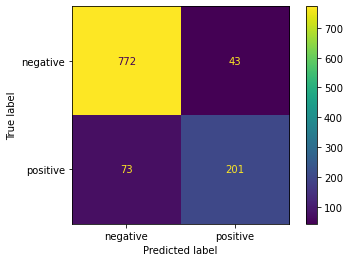

In [12]:
cm = confusion_matrix(y_test, svm_preds_linear)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['negative', 'positive'])
cm_display.plot()

In [13]:
# pickling the IF-IDF Vectorizer
import pickle
pickle.dump(tf_idf_vectorizer, open('../../model/svm_vectorizer.pkl', 'wb'))

# pickling the SVM Linear Classifier
pickle.dump(svm_linear_classifier, open('../../model/svm.pkl', 'wb'))